In [72]:
# importing all the packages and naming them as per our convinience.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
import warnings
warnings.filterwarnings('ignore')

In [2]:
"""1) Prepare a classification model using Naive Bayes for salary data"""

'1) Prepare a classification model using Naive Bayes for salary data'

In [9]:
# importing the train data using pandas.
Train_data=pd.read_csv("E:\\Naive Bayes\\SalaryData_Train.csv")
Train_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [10]:
# importing the test data using pandas.
Test_data=pd.read_csv("E:\\Naive Bayes\\SalaryData_Test.csv")
Test_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [12]:
# creating a dataframe using pandas.
df_train=pd.DataFrame(Train_data)
df_train
df_test=pd.DataFrame(Test_data)
df_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [14]:
# now we have to perform EDA on the train data instead of performing on both data sets test data used at the train test split.
df_train.shape

(30161, 14)

In [16]:
# info function gives us the raw information of data such as any null values, data types e.t.c.
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [17]:
# checking if there are any null values in the whole data using isna and sum function

df_train.isna().sum()

# we can see that  there are no null values in the whole data

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

array([[<AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'educationno'}>],
       [<AxesSubplot: title={'center': 'capitalgain'}>,
        <AxesSubplot: title={'center': 'capitalloss'}>],
       [<AxesSubplot: title={'center': 'hoursperweek'}>, <AxesSubplot: >]],
      dtype=object)

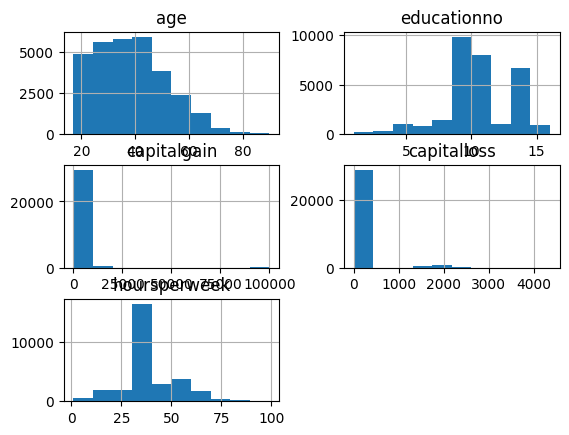

In [18]:
# histogram to check the distribution of data

df_train.hist()

# histogram is plotted for only continous values in the dataset as we can see

In [21]:
# now we have to check the relation between the two variables

df_train.corr()

# correlation is shown for only continous values in the dataset as we can see

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.043525,0.080152,0.060278,0.101598
educationno,0.043525,1.000000,0.124416,0.079691,0.152522
capitalgain,0.080152,0.124416,1.000000,-0.032218,0.080431
capitalloss,0.060278,0.079691,-0.032218,1.000000,0.052454
hoursperweek,0.101598,0.152522,0.080431,0.052454,1.000000


In [22]:
# as the data contains many categorical variables we have to convert them into int64 datatypes using the labelencoder
encoder = LabelEncoder()

In [64]:
# label encoding the object data types
Label = df_train.columns
Label = Label.drop(["age","educationno","capitalgain","capitalloss","hoursperweek","Salary"])

In [65]:
for i in Label:
    df_train[i] = encoder.fit_transform(df_train[i])

for i in Label:
    df_test[i] = encoder.fit_transform(df_test[i])

In [66]:
df_train.info()

# as we can see that the variables are converted into int64 datatype except the dependant variable salary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  int64 
 2   education      30161 non-null  int64 
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  int64 
 5   occupation     30161 non-null  int64 
 6   relationship   30161 non-null  int64 
 7   race           30161 non-null  int64 
 8   sex            30161 non-null  int64 
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  int64 
 13  Salary         30161 non-null  object
dtypes: int64(13), object(1)
memory usage: 3.2+ MB


In [63]:
# partiotioning the data into independant and dependant variables
x_train = df_train.drop("Salary",axis=1)
y_train = df_train[["Salary"]]

In [67]:
# transforming the data using standard scalar transfrom
transform = StandardScaler()

In [68]:
salary = transform.fit_transform(x_train)

In [39]:
# naive bayes model using GaussianNB
model = GaussianNB()

In [40]:
# fitting the model
model.fit(salary,y_train)

GaussianNB()

In [42]:
x_test = df_test.drop("Salary",axis=1)
y_test = df_test[["Salary"]]

In [43]:
y_pred = model.predict(x_test)

<AxesSubplot: >

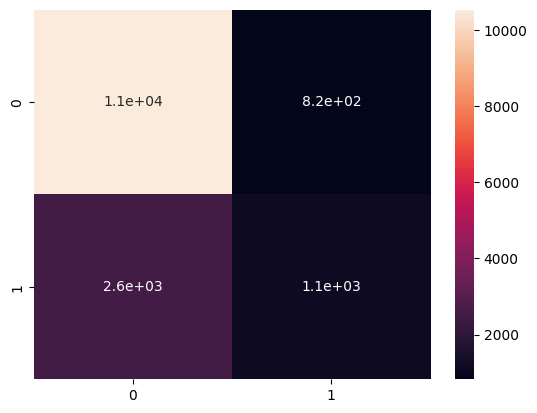

In [44]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [60]:
model_scores=accuracy_score(y_test,y_pred)
model_scores

0.7753652058432935

In [51]:
# naive bayes model using MultinomialNB
model2 = MultinomialNB()

In [83]:
model2.fit(x_train,y_train)

MultinomialNB()

In [54]:
y_pred2 =model2.predict(x_test)

In [84]:
model2_scores=accuracy_score(y_test,y_pred2)
model2_scores

0.7284196547144755

In [73]:
# naive bayes model using BernoulliNB
model3 = BernoulliNB()

In [85]:
# fitting the model
model3.fit(salary,y_train)

BernoulliNB()

In [86]:
y_pred2 =model3.predict(x_test)

In [87]:
model3_scores=accuracy_score(y_test,y_pred2)
model3_scores

0.6693891102257636

In [88]:
# make a table containing accuracy scores value for each prepared model.
scores={'Naive Bayes':['GausssianNB','MultinomialNB','BernoulliNB'],'Accuracy Scores':[model_scores,model2_scores,model3_scores]}
table=pd.DataFrame(scores)
table

# GaussianNB from Naivebayes has the best accuracy scores fot the salary prediction

,Naive Bayes,Accuracy Scores
0,GausssianNB,0.775365
1,MultinomialNB,0.728420
2,BernoulliNB,0.669389
